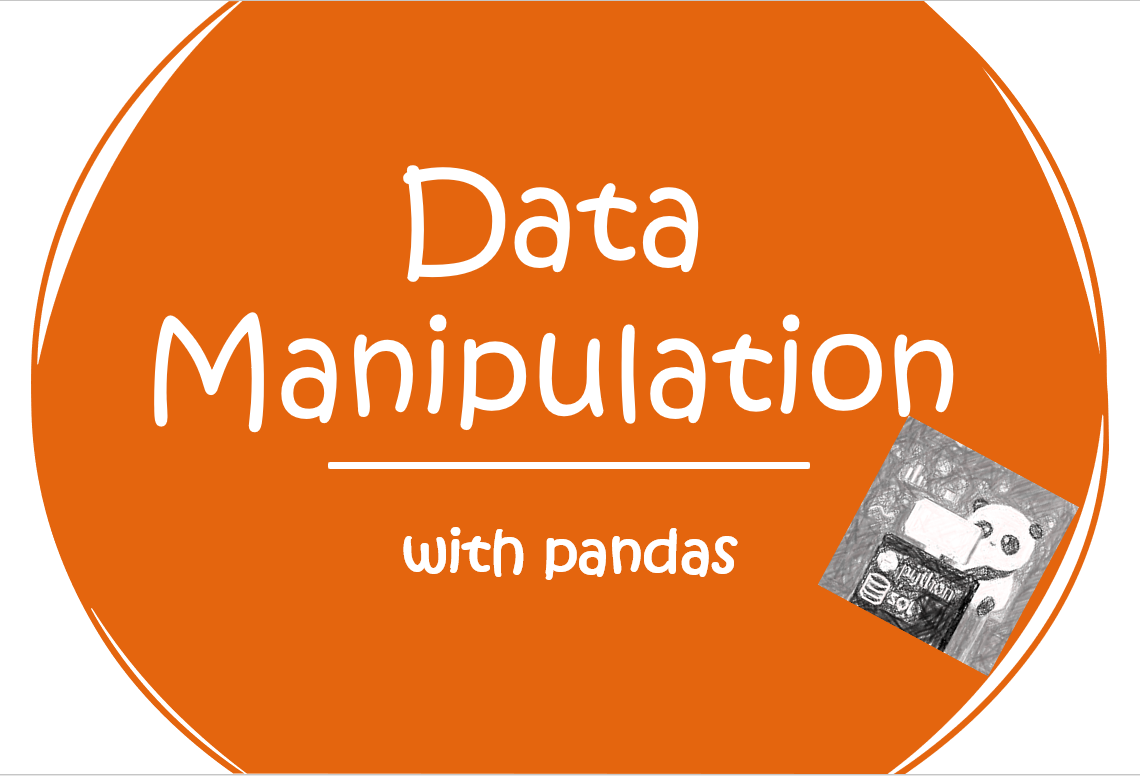

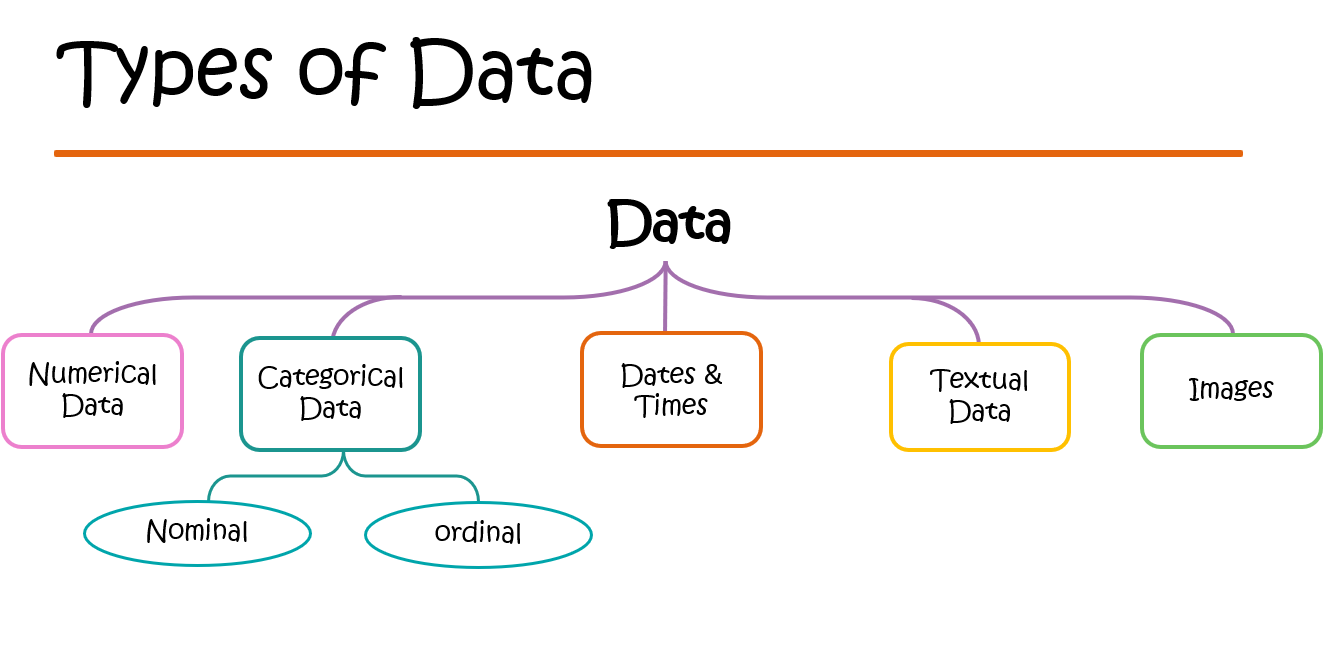

## <font color='Dark Orange'> Managing Numerical Data </font>

In [1]:
import numpy as np
from sklearn import preprocessing

In [2]:
# create a feature
feature= np.array([[-500.5],[-100.1],[0],[100.1],[900.9]])

In [3]:
feature

array([[-500.5],
       [-100.1],
       [   0. ],
       [ 100.1],
       [ 900.9]])

In [4]:
# create min-max scaler:
min_max = preprocessing.MinMaxScaler(feature_range=(-1,1))
# scale featute
scaled= min_max.fit_transform(feature)
scaled

array([[-1.        ],
       [-0.42857143],
       [-0.28571429],
       [-0.14285714],
       [ 1.        ]])

In [5]:
# create std scaler scaler:
std_sc = preprocessing.StandardScaler()
# scale feature
scaled2= std_sc.fit_transform(feature)
scaled2

array([[-1.26687088],
       [-0.39316683],
       [-0.17474081],
       [ 0.0436852 ],
       [ 1.79109332]])

In [6]:
display(scaled.mean(),scaled2.mean())

-0.17142857142857154

0.0

In [7]:
x=np.array([[-1000.5],[-200.1],[500],[600.1],[9000.9]])
x

array([[-1000.5],
       [ -200.1],
       [  500. ],
       [  600.1],
       [ 9000.9]])

In [8]:
# create robust scaler scaler:
rb_sc = preprocessing.RobustScaler()
# scale feature
scaled3= rb_sc.fit_transform(x)
scaled3

array([[-1.87515621],
       [-0.87490627],
       [ 0.        ],
       [ 0.12509373],
       [10.62346913]])

###  Normalizing Observations

In [9]:
# Load libraries
import numpy as np
from sklearn.preprocessing import Normalizer
feature=np.array([[0.5,0.5],[1.1,3.5],[1.63,34.4],[12.2,3.3]])


In [11]:
# Create normalizer
normalizer = Normalizer(norm="l2")  # l2 Eucledian measurement
# Transform feature matrix
normalizer.transform(feature) 
#Scaling inputs to unit norms is a common operation for text classification or clustering for instance

array([[0.70710678, 0.70710678],
       [0.2998266 , 0.95399372],
       [0.04733062, 0.99887928],
       [0.96530951, 0.26110831]])

### Generating Polynomial and Interaction Features
You want to create polynominal and interaction features.

In [12]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
features=np.array([[2,3],[2,3],[2,3]])
features

array([[2, 3],
       [2, 3],
       [2, 3]])

In [13]:
# Create PolynomialFeatures object
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)
# Create polynomial features
polynomial_interaction.fit_transform(features)
# High degrees can cause overfitting.

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

__NOTE__ Look at the values of array. It contains $x_1$,$x_2$,$x_1^2$, $x_2^2$,$x_1x_2$. If you wanna include the interaction between $x_1x_2$

In [14]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

### Detecting Outliers

In [15]:
# Load libraries
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

In [16]:
# Create simulated data
features, _ = make_blobs(n_samples = 10,
                n_features = 2,
                centers = 1,
                random_state = 1)
features

array([[-1.83198811,  3.52863145],
       [-2.76017908,  5.55121358],
       [-1.61734616,  4.98930508],
       [-0.52579046,  3.3065986 ],
       [ 0.08525186,  3.64528297],
       [-0.79415228,  2.10495117],
       [-1.34052081,  4.15711949],
       [-1.98197711,  4.02243551],
       [-2.18773166,  3.33352125],
       [-0.19745197,  2.34634916]])

In [17]:
# Replace the first observation's values with extreme values
features[0,0] = 10000
features[0,1] = 10000
features

array([[ 1.00000000e+04,  1.00000000e+04],
       [-2.76017908e+00,  5.55121358e+00],
       [-1.61734616e+00,  4.98930508e+00],
       [-5.25790464e-01,  3.30659860e+00],
       [ 8.52518583e-02,  3.64528297e+00],
       [-7.94152277e-01,  2.10495117e+00],
       [-1.34052081e+00,  4.15711949e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-2.18773166e+00,  3.33352125e+00],
       [-1.97451969e-01,  2.34634916e+00]])

In [18]:
# Create detector
outlier_detector = EllipticEnvelope(contamination=.1) #The amount of contamination of the data set Range is (0, 0.1]. 
# the proportion of observations that are outliers. Think of contamination as our estimate of the cleanliness of our data.
# Fit detector
outlier_detector.fit(features)
# Predict outliers
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

__IMPORTANT!__  A major limitation of this approach is the need to specify a contamination parameter (the proportion of observations that are outliers) Think of contamination as our estimate of the cleanliness of our data. If you think that your data contains a few number of outliers the small contamination parameter you should use. Otherwise, it must be selected a big ratio!

In [21]:
feature = features[:,0]
feature

array([ 1.00000000e+04, -2.76017908e+00, -1.61734616e+00, -5.25790464e-01,
        8.52518583e-02, -7.94152277e-01, -1.34052081e+00, -1.98197711e+00,
       -2.18773166e+00, -1.97451969e-01])

In [19]:
# Describing IQR to detect outlier position~ alternative to box plot
feature = features[:,0]
# Create a function to return index of outliers
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)    #getting more bigger interval
    return np.where((x > upper_bound) | (x < lower_bound))
# Run function
indicies_of_outliers(feature) #denotes which row is the outliers

(array([0], dtype=int64),)

### Handling with Missing values

In [ ]:
# Just Once
!pip install fancyimpute

In [27]:
# Create simulated data
features, _ = make_blobs(n_samples = 10,
                n_features = 2,
                random_state = 1)

In [28]:
features

array([[ -7.23731039,  -9.03108652],
       [ -8.16550136,  -7.00850439],
       [ -7.02266844,  -7.57041289],
       [ -8.86394306,  -5.05323981],
       [  0.08525186,   3.64528297],
       [ -0.79415228,   2.10495117],
       [ -1.34052081,   4.15711949],
       [-10.32012971,  -4.3374029 ],
       [ -2.18773166,   3.33352125],
       [ -8.53560457,  -6.01348926]])

In [23]:
# Load libraries
import numpy as np
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
# Create simulated data
features, _ = make_blobs(n_samples = 1000,
                n_features = 2,
                random_state = 1)
scalr= StandardScaler()
std_features=scalr.fit_transform(features)

In [24]:
true_value =std_features[0,0] #keep the first value to check the accuracy of the imputation
std_features[0,0] =np.nan

In [35]:
features_est_value = KNN(k=4, verbose=0).fit_transform(std_features)

In [36]:
print('true_value',true_value)
print('estimated_value_KNN',features_est_value[0,0])

true_value 0.8730186113995938
estimated_value_KNN 1.0944258208256634


In [ ]:
## Discussion : nba Salary KNN valuntary! 30 points

## <font color='Dark Orange'> Managing Categorical Data </font>
***
### 1- Encoding Nominal Categorical Features

####  Way 1) Using sci-kit learn library

In [37]:
# Import libraries
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

In [41]:
features=np.array([["Texas"],["California"],["Havaii"],["Delaware"],["Texas"]])

In [40]:
features

array([['Texas'],
       ['California'],
       ['Texas'],
       ['Delaware'],
       ['Texas']], dtype='<U10')

In [45]:
one_hot = LabelBinarizer()
a=one_hot.fit_transform(features)

In [43]:
one_hot.classes_

array(['California', 'Delaware', 'Havaii', 'Texas'], dtype='<U10')

In [46]:
one_hot.inverse_transform(a)

array(['Texas', 'California', 'Havaii', 'Delaware', 'Texas'], dtype='<U10')

### <font color='Blue'> Multiclass features</font>

In [47]:
multi_features=[("Florida","Havaii"),("Texas","Alabama"),("Delaware","Florida"),("Texas","Alabama")]

In [48]:
multi_features

[('Florida', 'Havaii'),
 ('Texas', 'Alabama'),
 ('Delaware', 'Florida'),
 ('Texas', 'Alabama')]

In [49]:
one_hot_multi = MultiLabelBinarizer()
one_hot_multi.fit_transform(multi_features)

array([[0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 1]])

In [50]:
one_hot_multi.classes_

array(['Alabama', 'Delaware', 'Florida', 'Havaii', 'Texas'], dtype=object)

####  Way 2) Using pandas library

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
pd.get_dummies(features[:,0])

,California,Delaware,Havaii,Texas
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,0,1


## on a real-dataset

### <font color='Blue'> Oneclass features</font>

In [54]:
dataset=pd.read_csv('titanic.csv')

In [55]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [59]:
Sex_converted = pd.get_dummies(dataset['Sex'], drop_first=True)

In [60]:
Sex_converted

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [61]:
dataset= pd.concat([dataset,Sex_converted],axis=1)

In [63]:
dataset.drop('Sex',axis=1,inplace=True)

In [64]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


Advantages :

· Simple to use and fits well for data with few categories.

Disadvantages:

· A high cardinality of higher categories will increase the feature space, resulting in the curse of dimensionality.

### <font color='Blue'> Multiclass features</font>

In [65]:
df=pd.read_csv('mercendez.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [66]:
for col in df.columns:
    print(col,':',len(df[col].unique()))

X0 : 47
X1 : 27
X2 : 44
X3 : 7
X4 : 4
X5 : 29
X6 : 12


In [67]:
df.X1.value_counts()

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

In [69]:
list_top_10 =df.X1.value_counts().sort_values(ascending=False).head(10).index
list_top_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [70]:
for categ in list_top_10:
    df[categ] = np.where(df['X1']==categ, 1,0)
df.head()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


In [72]:
df.drop('X1', axis=1,inplace=True)

In [73]:
df.sample()

,X0,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
3675,ay,as,f,d,v,d,0,0,0,0,0,1,0,0,0,0


Advantages:

· Easy to implement

· Does not expand massively the feature space

Disadvantages :

· Does not keep track of category values that are overlooked.

## <font color='Dark Orange'> Managing Categorical Data </font>
***
### 2- Encoding Ordinal Categorical Features
> ####  2.1- Ordinal Number Encoding

In [74]:
dataframe=pd.DataFrame({'Score':['Low','Low','Medium','Medium','High']})
dataframe

,Score
0,Low
1,Low
2,Medium
3,Medium
4,High


In [75]:
scale_mapper = {'Low':1,
               'Medium':2,
               'High':3}

dataframe['Score'].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64

In [76]:
data=pd.DataFrame({'Score':['Low','Low','High','Medium','High','Barely more than Medium','Medium','High','High','Low']})

In [77]:
data

,Score
0,Low
1,Low
2,High
3,Medium
4,High
5,Barely more than Medium
6,Medium
7,High
8,High
9,Low


In [78]:
scale_mapper = {'Low':1,
               'Medium':2,
                'Barely more than Medium':2.3,
               'High':3}

data['Score'].replace(scale_mapper)

0    1.0
1    1.0
2    3.0
3    2.0
4    3.0
5    2.3
6    2.0
7    3.0
8    3.0
9    1.0
Name: Score, dtype: float64

In [79]:
data['Score'].map(scale_mapper)

0    1.0
1    1.0
2    3.0
3    2.0
4    3.0
5    2.3
6    2.0
7    3.0
8    3.0
9    1.0
Name: Score, dtype: float64

Advantages :

· Easy and straightforward to implement

· Widely used in survey and research data encoding.

Disadvantages:

· Do not have a standardized interval scale.

> #### 2.2-Count/Frequency Encoding : This technique we will substitute the categories by the count of the observations that show that category in the dataset.

In [80]:
# on real data
dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None) 

In [81]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [82]:
columns=[1,3,5,6,7,8,9,13]
dataset1=dataset[columns]
dataset1.columns=['Employment','Degree','Status','Designation',
                 'Family_job','Race','Sex','Country']
dataset1.head()

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [84]:
for col in dataset1.columns:
    print(col,':', len(dataset1[col].unique()),' labels')

Employment : 9  labels
Degree : 16  labels
Status : 7  labels
Designation : 15  labels
Family_job : 6  labels
Race : 5  labels
Sex : 2  labels
Country : 42  labels


In [85]:
country_map = dataset1['Country'].value_counts().to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [86]:
dataset1['Country'] = dataset1['Country'].map(country_map)

C:\Users\silao\AppData\Local\Temp\ipykernel_2412\1465534355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['Country'] = dataset1['Country'].map(country_map)


In [87]:
dataset1.head()

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


Advantages:

· Easy to implement

· There will be no increase in feature space.

· Work well with the tree-based algorithms.

Disadvantages:

It will not provide the same weight if the frequencies are the same.

> #### Target Guided Ordinal Encoding: This technique transforms the categorical variable by comparing it to the target or output variable

In [88]:
dataset=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
dataset.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [89]:
dataset['Cabin']= dataset['Cabin'].astype(str).str[0]

In [90]:
dataset.head()

,Survived,Cabin
0,0,n
1,1,C
2,1,n
3,1,C
4,0,n


In [93]:
ordinal_index = dataset.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [94]:
ordinal_index

Index(['T', 'n', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [95]:
ordinal_label= {k:i for i,k in enumerate(ordinal_index,0)}
ordinal_label

{'T': 0, 'n': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [96]:
dataset['Cabin_label']=dataset['Cabin'].map(ordinal_label)

In [99]:
dataset.sample(7)

,Survived,Cabin,Cabin_label
488,0,n,1
434,0,E,7
72,0,n,1
859,0,n,1
313,0,n,1
82,1,n,1
230,1,C,4


Steps:

1) Choose a categorical variable.

2) Take the aggregated mean of the categorical variable and apply it to the target variable.

3) Assign higher integer values or a higher rank to the category with the highest mean.

Advantages:

· Establish a monotonic relationship between the variable and the target.

· Helps in faster learning

Disadvantages:

· Because of the close relationship to the target variable, it often leads to overfitting.

> #### Mean Ordinal Encoding: It’s a sight variant of target-guided ordinal encoding and is viral among data scientists. Instead of an integer, data can be replaced by the mean such that

In [100]:
mean_ord = dataset.groupby(['Cabin'])['Survived'].mean().to_dict()

In [101]:
mean_ord

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'T': 0.0,
 'n': 0.29985443959243085}

In [102]:
dataset['Cabin_mean']=dataset['Cabin'].map(mean_ord)

In [103]:
dataset.head()

,Survived,Cabin,Cabin_label,Cabin_mean
0,0,n,1,0.299854
1,1,C,4,0.593220
2,1,n,1,0.299854
3,1,C,4,0.593220
4,0,n,1,0.299854


Advantages:

· Improves classification model efficiency.

· Fast acquisition of information

Disadvantages:

· Leads to overfitting

· May lead to possible loss of value if two categories have the same mean

> #### Probability Ratio Encoding: This technique is suitable for classification problems only when the target variable is binary(Either 1 or 0 or True or False).

> In this technique, we will substitute the category value with the probability ratio i.e. P(1)/P(0). Steps :

> 1) Using the categorical variable, evaluate the probability of the Target variable (where the output is True or 1).

> 2) Calculate the probability of the Target variable having a False or 0 output.

> 3) Calculate the probability ratio i.e. P(True or 1) / P(False or 0).

> 4) Replace the category with a probability ratio.

In [104]:
prob_surv = dataset.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_surv)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
n,0.299854


In [105]:
prob_df['Died'] = 1-prob_df['Survived']

In [106]:
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
T,0.000000,1.000000
n,0.299854,0.700146


In [107]:
prob_df['prob_ratio'] = prob_df['Survived']/prob_df['Died']

In [108]:
pro_enc= prob_df['prob_ratio'].to_dict()
pro_enc

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'T': 0.0,
 'n': 0.42827442827442824}

In [109]:
dataset['Cabin_prob']=dataset['Cabin'].map(pro_enc)

In [110]:
dataset.head()

,Survived,Cabin,Cabin_label,Cabin_mean,Cabin_prob
0,0,n,1,0.299854,0.428274
1,1,C,4,0.593220,1.458333
2,1,n,1,0.299854,0.428274
3,1,C,4,0.593220,1.458333
4,0,n,1,0.299854,0.428274


Advantages:

· Do not expand the feature space.

· Captures information from within the category, resulting in more predictive features.

Disadvantages:

· Not defined when the denominator is 0.

· It sometimes results in overfitting.